In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()
path

'C:\\Users\\Matthew\\Documents\\CS4375'

In [2]:
df = pd.read_csv('penguins_size.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [5]:
df = df.dropna()
#Drop the non applicable values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [7]:
X = pd.get_dummies(df.drop("species", axis=1),drop_first=True)
y = df['species']

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=(0.3),random_state = 101)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
help(RandomForestClassifier)
#read about it, default criteria is gini, etc.

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [16]:
model = RandomForestClassifier(n_estimators=10, max_features = "auto", random_state=101)

In [17]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [18]:
preds = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [20]:
confusion_matrix(y_test, preds)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

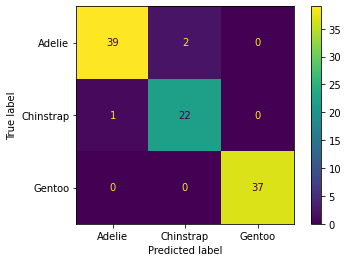

In [21]:
plot_confusion_matrix(model, X_test, y_test)

In [23]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [24]:
pd.DataFrame(index=X.columns,data = model.feature_importances_, columns=["Feature Importance"])

,Feature Importance
culmen_length_mm,0.318677
culmen_depth_mm,0.101849
flipper_length_mm,0.173434
body_mass_g,0.213170
island_Dream,0.145121
island_Torgersen,0.037201
sex_FEMALE,0.006323
sex_MALE,0.004226


In [39]:
test_error = []

for n in range(1, 40):
    #Use n random trees
    model = RandomForestClassifier(n_estimators=n, max_features = "auto")
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

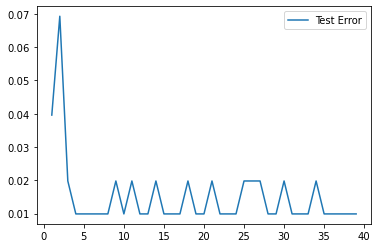

In [40]:
plt.plot(range(1,40), test_error, label="Test Error")
plt.legend()
#Error goes up and down, the most trees and the error will settle down.
#no reason to do 100 trees when it settles down around 5 anyways

In [41]:
test_error

[0.03960396039603964,
 0.06930693069306926,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991]